# Q 2.4

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [2]:
def log_MSE(y_pred, y_true):
    return math.log(np.square(np.subtract(y_true,y_pred)).mean())

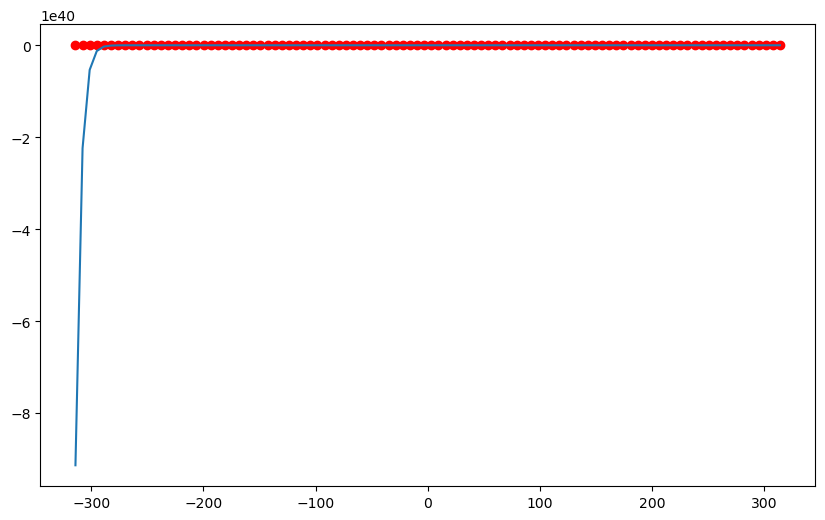

In [12]:

# training data, size =100
x = np.linspace(- 100*np.pi, 100*np.pi, 100)  
y = np.sin(x)

random.seed(531)
# randomed drwan test data (fixed for different training sets)
x_test = np.random.uniform(- 100*np.pi, 100*np.pi, 50) # draw random test set, size =50
y_test = np.sin(x_test)

poly = lagrange(x, y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x, poly(x), label='Lagrange Interpolation')
#plt.plot(x_interpolate, sin_function(x_interpolate), label='sin(x)', linestyle='--')

In [16]:
train_error = [log_MSE(y, poly(x))]
test_error = [log_MSE(y_test, poly(x_test))]

print("Train Error (no error):", train_error)
print("Test Error (no error):", test_error)

Train Error (no error): [193.98224878308886]
Test Error (no error): [186.40685723821792]


In [17]:
sigma = [0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20]

for sd in sigma:
    x_train = np.add(x, np.random.normal(0,sd,100)) # train data (x+\epsilon, sin(x+\epsilon))
    y_train = np.sin(x_train) # y_train based on x_train
    poly = lagrange(x_train, y_train)
    
    train_error.append(log_MSE(y_train, poly(x_train)))
    test_error.append(log_MSE(y_test, poly(x_test)))
    
err = { 'sd':[0]+sigma, 'log_train_error':train_error, 'log_test_error':test_error}
err = pd.DataFrame(err).set_index('sd')
print(err)

       log_train_error  log_test_error
sd                                    
0.00        193.982249      186.406857
0.01        180.715979      175.372159
0.10        185.249501      178.708915
0.20        184.444032      177.792258
0.30        181.605244      174.281107
0.50        184.476620      177.170706
1.00        183.654942      178.003621
2.00        186.910992      180.526865
5.00        190.977294      186.360913
10.00       201.432803      194.269636
20.00       220.100247      204.961278


<AxesSubplot:title={'center':'log_err v.s. standard_deviation'}, xlabel='sd'>

<Figure size 800x600 with 0 Axes>

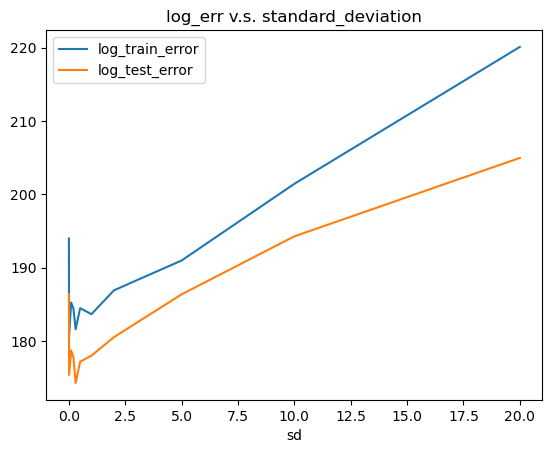

In [18]:
plt.figure(figsize=(8, 6))
err.plot(title="log_err v.s. standard_deviation")
#plt.plot(err['sd'], err['log_test_error'], label='mial')